In [136]:
import pandas as pd
import seaborn as sns
import jsonlines

In [137]:
filename = '../logs/2020-06-08T20:41:30.715069.log'

In [138]:
def load_jsonlines(filename):
    with jsonlines.open(filename) as r:
        for obj in r:
            yield obj

In [139]:
df = pd.DataFrame.from_records(load_jsonlines(filename))

In [140]:
dfe = df[df['done']]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [141]:
dfe.head()

,avg_episode_rewards,avg_reward,done,episode,episode_rewards,episode_step,eps,event,mode,rewards,timestamp,episode_step_rolling
20,21.0,1.0,True,0,21.0,20,0.819112,finished step,train,1.0,2020-06-08T20:41:32.016323,NaN
34,14.0,1.0,True,0,14.0,13,0.819112,finished step,eval,1.0,2020-06-08T20:41:32.487559,NaN
53,19.0,1.0,True,1,19.0,18,0.749409,finished step,train,1.0,2020-06-08T20:41:33.560369,NaN
95,42.0,1.0,True,2,42.0,41,0.616930,finished step,train,1.0,2020-06-08T20:41:35.439279,NaN
106,11.0,1.0,True,3,11.0,10,0.586591,finished step,train,1.0,2020-06-08T20:41:35.931943,NaN


In [142]:
episode_step_rolling = dfe['episode_step'].groupby(dfe['mode']).rolling(window=100).mean()
episode_step_rolling.index = episode_step_rolling.index.droplevel(level=0)
dfe['episode_step_rolling'] = episode_step_rolling

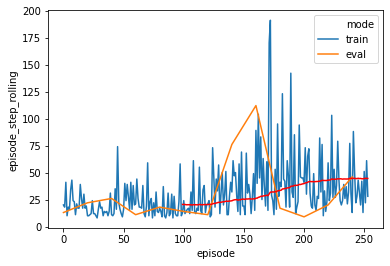

In [143]:
sns.lineplot(data=dfe, x='episode', y='episode_step', hue='mode')
sns.lineplot(data=dfe[dfe['mode'] == 'train'], x='episode', y='episode_step_rolling', color='red')

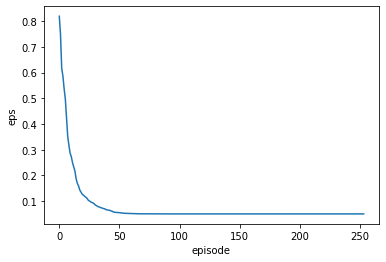

In [144]:
sns.lineplot(data=dfe[dfe['mode'] == 'train'], x='episode', y='eps')